# **Rekomendasi Film Indonesia**
Nur Baiti Nasution

Source Data :https://www.kaggle.com/dimitriirfan/indonesian-film-industry-most-made-genre/


### Mengimport Library yang dibutuhkan

In [2]:
# Import Library

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse as sp
from sklearn.metrics import pairwise as pw
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# Load data di Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#membaca file
df = pd.read_csv('/content/drive/MyDrive/dicoding/indonesian_movies.csv')
df.head()

,title,year,description,genre,rating,users_rating,votes,languages,directors,actors,runtime
0,#FriendButMarried 2,2020,Ayudia (Mawar De Jongh) is not satisfied enoug...,Biography,13+,6.5,120,Indonesian,Rako Prijanto,"['Adipati Dolken', 'Mawar Eva de Jongh', 'Vonn...",100 min
1,4 Mantan,2020,"Sara, Airin, Rachel, and Amara were accidental...",Thriller,17+,6.4,8,Indonesian,Hanny Saputra,"['Ranty Maria', 'Jeff Smith', 'Melanie Berentz...",80 min
2,Aku Tahu Kapan Kamu Mati,2020,"After apparent death, Siena is able to see sig...",Horror,13+,5.4,17,Indonesian,Hadrah Daeng Ratu,"['Natasha Wilona', 'Ria Ricis', 'Al Ghazali', ...",92 min
3,Anak Garuda,2020,"Good Morning Indonesia, a school for poor orph...",Adventure,13+,9.1,27,Indonesian,Faozan Rizal,"['Tissa Biani Azzahra', 'Violla Georgie', 'Aji...",129 min
4,Dignitate,2020,Alfi (Al Ghazali) meets Alana (Caitlin Halderm...,Drama,17+,7.6,33,Indonesian,Fajar Nugros,"['Al Ghazali', 'Caitlin Halderman', 'Giorgino ...",109 min


In [5]:
#menampilkan jenis atribut yang terlibat
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1272 entries, 0 to 1271
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         1272 non-null   object 
 1   year          1272 non-null   int64  
 2   description   840 non-null    object 
 3   genre         1236 non-null   object 
 4   rating        376 non-null    object 
 5   users_rating  1272 non-null   float64
 6   votes         1272 non-null   object 
 7   languages     1272 non-null   object 
 8   directors     1265 non-null   object 
 9   actors        1272 non-null   object 
 10  runtime       869 non-null    object 
dtypes: float64(1), int64(1), object(9)
memory usage: 109.4+ KB




Kiita dapat melihat informasi tentang DataFrame pada data yang telah dibaca berupa type data, kolom, nilai non-null.



### **Univariate Exploratory Data Analysis**

In [6]:
#mengelompokkan setiap variabel berdasarkan jenis datanya, numerik atau kategorikal
numeric = ['year','users_rating']
category = ['genre','rating','languages','votes','directors']

##### **Numerical Feature**


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f170a09c910>,
      dtype=object)

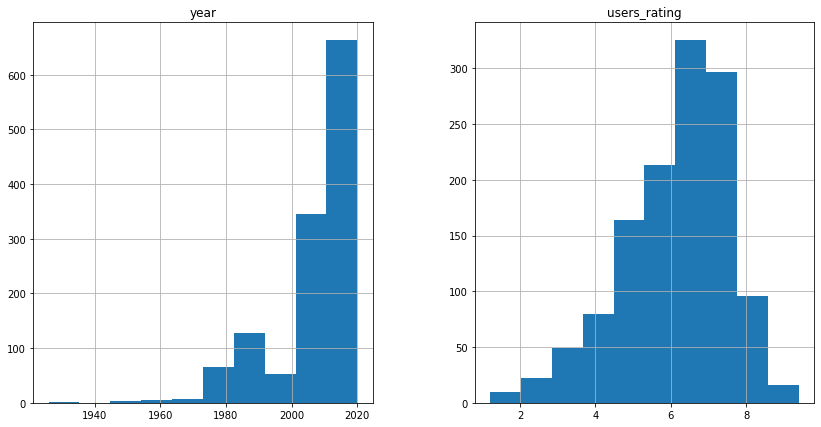

In [7]:
#histogram
df[numeric].hist(figsize=(14,7))

In [8]:
#Sebaran Statistik
df[numeric].describe()

,year,users_rating
count,1272.000000,1272.000000
mean,2007.023585,6.144418
std,12.968560,1.389315
min,1926.000000,1.200000
25%,2006.000000,5.300000
50%,2011.000000,6.400000
75%,2016.000000,7.100000
max,2020.000000,9.400000


##### **Categorical Feature**

##### Fitur Genre

           jumlah sampel  persentase
Drama                456        36.9
Comedy               287        23.2
Horror               231        18.7
Action               132        10.7
Adventure             49         4.0
Biography             28         2.3
Thriller              12         1.0
Romance               11         0.9
Fantasy               10         0.8
Crime                  9         0.7
Animation              4         0.3
Sci-Fi                 2         0.2
Family                 2         0.2
War                    2         0.2
History                1         0.1


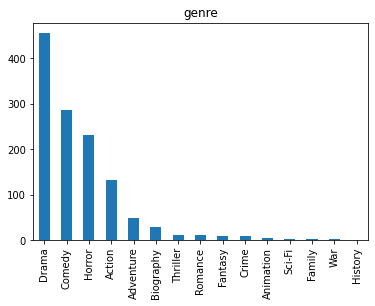

In [9]:
#GENRE
feature = category[0]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
dfx = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(dfx)
count.plot(kind='bar', title=feature);

#### Fitur Rating

           jumlah sampel  persentase
13+                  161        42.8
17+                   93        24.7
SU                    39        10.4
D                     25         6.6
R                     23         6.1
Not Rated             18         4.8
21+                    8         2.1
TV-MA                  4         1.1
TV-14                  2         0.5
PG-13                  2         0.5
Unrated                1         0.3


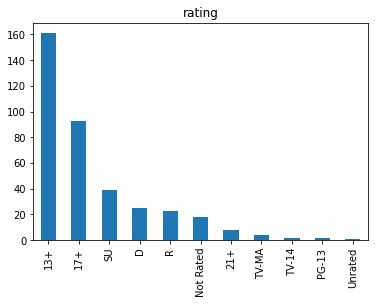

In [10]:
#RATING
feature = category[1]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
dfx = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(dfx)
count.plot(kind='bar', title=feature);

#### Fitur Languages

             jumlah sampel  persentase
Indonesian            1241        97.6
English                 21         1.7
Japanese                 3         0.2
Minangkabau              2         0.2
Dutch                    2         0.2
French                   1         0.1
Malay                    1         0.1
Mandarin                 1         0.1


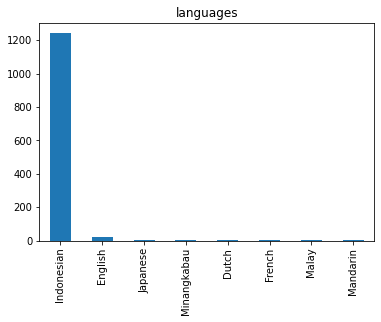

In [11]:
#LANGUAGES
feature = category[2]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
dfx = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(dfx)
count.plot(kind='bar', title=feature);

In [12]:
rating_movies_count = df.groupby('title')['users_rating'].mean()
rating_movies_count = pd.DataFrame(rating_movies_count).reset_index().rename(columns={'users_rating':'total_rating'})
rating_movies_count.head()

,title,total_rating
0,#66,5.9
1,#FriendButMarried,6.9
2,#FriendButMarried 2,6.5
3,#Malam Jumat: The Movie,5.3
4,#MoveOnAja,6.3


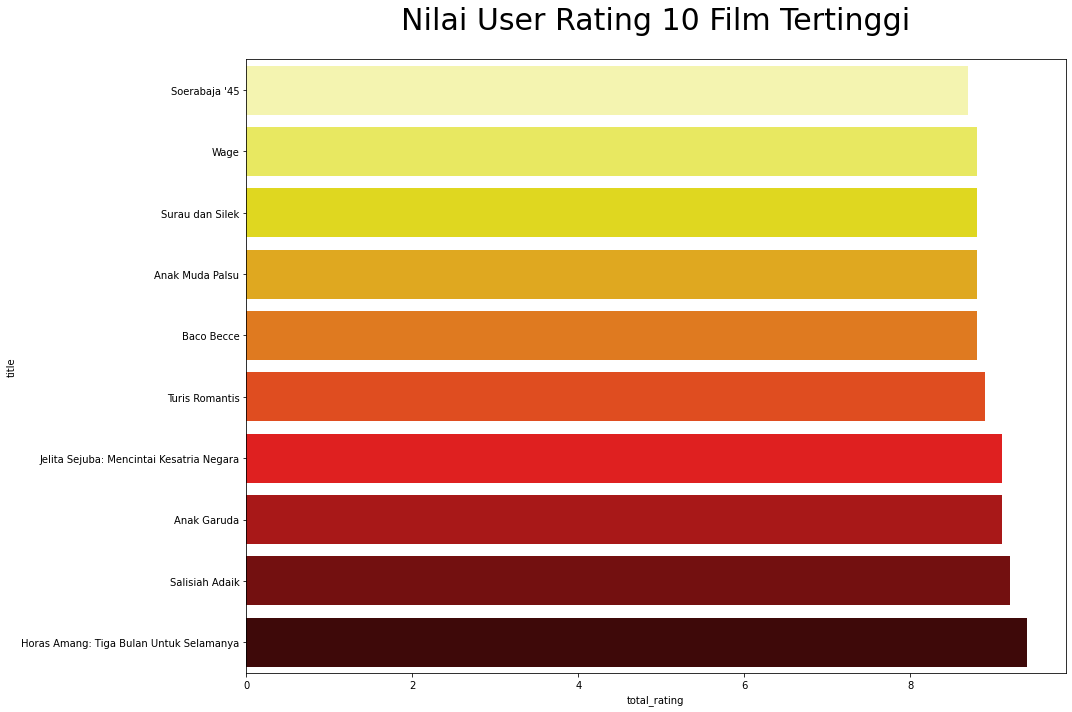

In [13]:
datax = rating_movies_count.sort_values(by ='total_rating')

plt.figure(figsize=(15,10))
sns.barplot(data=datax.iloc[-10:,:], 
            y='title', x='total_rating',
            palette="hot_r")
plt.title('Nilai User Rating 10 Film Tertinggi', pad=30, fontsize=30)
plt.tight_layout()
plt.show()

In [14]:
#mengecek banyaknya nilai unik dari genre, rating, votes, language and directors
df[category].describe()

,genre,rating,languages,votes,directors
count,1236,376,1272,1272,1265
unique,15,11,8,312,377
top,Drama,13+,Indonesian,6,Nayato Fio Nuala
freq,456,161,1241,58,61


## DATA PREPARATION

In [15]:
df.genre.unique()

array(['Biography', 'Thriller', 'Horror', 'Adventure', 'Drama', 'Comedy',
       'Animation', 'Action', 'History', 'Crime', 'Romance', 'Sci-Fi',
       'Family', nan, 'War', 'Fantasy'], dtype=object)

In [16]:
len(df.genre.unique())

16

In [17]:
judul = df['title'].tolist()
genre = df['genre'].tolist()

print(len(judul))
print(len(genre))

1272
1272


Pada tahap ini dipilih beberapa kolom berdasarkan data yang dibutuhkan untuk melakukan content based learning berdasarkan genre yaitu judul dan genre


In [18]:
data = pd.DataFrame({
    'judul': judul,
    'genre': genre
})
data.head()

,judul,genre
0,#FriendButMarried 2,Biography
1,4 Mantan,Thriller
2,Aku Tahu Kapan Kamu Mati,Horror
3,Anak Garuda,Adventure
4,Dignitate,Drama


In [19]:
data.isnull().sum()

judul     0
genre    36
dtype: int64

terdapat nilai kosong di kolom genre sebanyak 36, maka kita drop saja baris yang mempunya genre kosong

In [20]:
data.dropna(inplace=True)


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1236 entries, 0 to 1271
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   judul   1236 non-null   object
 1   genre   1236 non-null   object
dtypes: object(2)
memory usage: 29.0+ KB


Sekarang sudah tidak ada data yang kosong yang perlu di isi atau dihapus

In [22]:
#Mendrop data duplicate
data.drop_duplicates(subset=['judul'], keep='first', inplace=True)

In [23]:
#Mereset index
data.reset_index()
data.head()

,judul,genre
0,#FriendButMarried 2,Biography
1,4 Mantan,Thriller
2,Aku Tahu Kapan Kamu Mati,Horror
3,Anak Garuda,Adventure
4,Dignitate,Drama


In [24]:
#Mengubah data genre bertipe objek, agar bisa diolah
genre = [str (item) for item in data['genre']]
genre = [item for item in genre if not isinstance(item, int)]

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1226 entries, 0 to 1271
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   judul   1226 non-null   object
 1   genre   1226 non-null   object
dtypes: object(2)
memory usage: 28.7+ KB


##Feature Engineering

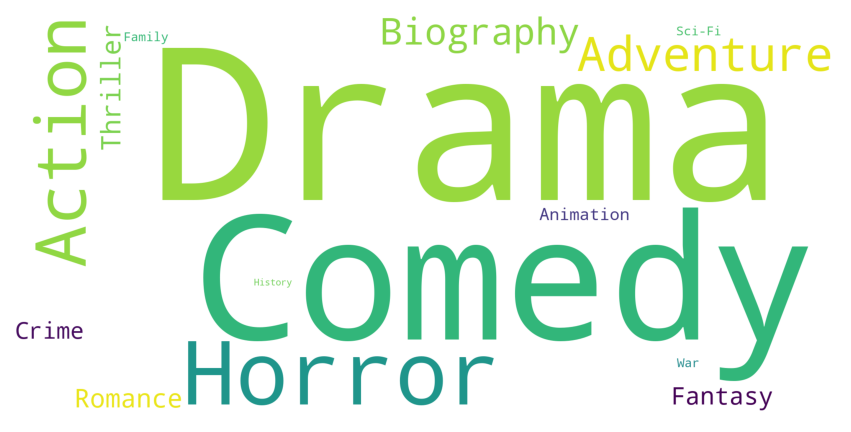

In [26]:
#WorlCloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

word_could_dict=Counter(genre)
wordcloud = WordCloud(width = 2000, height = 1000,background_color="white").generate_from_frequencies(word_could_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
     
# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()
     
# Melakukan perhitungan idf pada data genre
tf.fit(data['genre']) 
     
# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names() 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['action',
 'adventure',
 'animation',
 'biography',
 'comedy',
 'crime',
 'drama',
 'family',
 'fantasy',
 'fi',
 'history',
 'horror',
 'romance',
 'sci',
 'thriller',
 'war']

In [28]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(genre) 
 
# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(1226, 16)

In [29]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [30]:
from sklearn.metrics.pairwise import cosine_similarity
 
# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix) 
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [31]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['judul'], columns=data['judul'])
print('Shape:', cosine_sim_df.shape)
 

cosine_sim_df.sample(5, axis=1).sample(5, axis=0)

Shape: (1226, 1226)


judul,Kehormatan di Balik Kerudung,Ferocious Female Freedom Fighters,Catatan Si Boy 2,Jenderal Kancil: The Movie,Barang Terlarang
judul,,,,,
Kutukan Arwah Santet,0.0,0.0,0.0,0.0,0.0
Preman in Love,0.0,0.0,0.0,1.0,0.0
What's Up with Love?,1.0,0.0,1.0,0.0,0.0
12:06 Rumah Kucing,0.0,0.0,0.0,0.0,0.0
#FriendButMarried 2,0.0,0.0,0.0,0.0,0.0


MODEL

In [32]:
indices = pd.Series(index = data['judul'], data = data.index).drop_duplicates()
indices.head(7)

judul
#FriendButMarried 2                      0
4 Mantan                                 1
Aku Tahu Kapan Kamu Mati                 2
Anak Garuda                              3
Dignitate                                4
Guru-Guru Gokil                          5
Hunter in the Blue Side of Manchester    6
dtype: int64

In [51]:
 def get_rekomendasi(judul, similarity_data=cosine_sim_df, items=data[['judul', 'genre']], k=10):
          
     
        # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan    
        # Dataframe diubah menjadi numpy
        # Range(start, stop, step)
        index = similarity_data.loc[:,judul].to_numpy().argpartition(
            range(-1, -k, -1))
        
        # Mengambil data dengan similarity terbesar dari index yang ada
        closest = similarity_data.columns[index[-1:-(k+2):-1]]
        
        # Drop nama_resto agar nama resto yang dicari tidak muncul dalam daftar rekomendasi
        closest = closest.drop(judul, errors='ignore')
     
        return pd.DataFrame(closest).merge(items).head(k)

In [58]:
datafilm=input('Masukan Nama Film : ')
datafilm2 = data[data.judul.eq(datafilm)]
datafilm2

Masukan Nama Film : Love Is Blind


,judul,genre
73,Love Is Blind,Comedy


In [59]:
rekomendasi = pd.DataFrame(get_rekomendasi(datafilm))
print('--------------------------------------')
print('            REKOMENDASI FILM')
print('--------------------------------------')
rekomendasi

--------------------------------------
            REKOMENDASI FILM
--------------------------------------


,judul,genre
0,Kejarlah Jodoh Kau Kutangkap,Comedy
1,Hangout,Comedy
2,D.O. (Drop Out),Comedy
3,Coblos Cinta,Comedy
4,Gara-Gara Bola,Comedy
5,XXL: Double Extra Large,Comedy
6,Basahhh...,Comedy
7,Claudia/Jasmine,Comedy
8,Cinlok,Comedy
9,Anda Puas Saya Loyo,Comedy
